In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/dionisos/dionisos_horizons/gempy_format/teste_1/"
geo_model = gp.create_model("Dionisos-BES-Horizons-v1")

No module named 'osgeo'


### Detalhes dos dados
- Contém os horizontes 1, 2 e 27 gerado do dionisos e convertido para .csv
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000)
- O Z dos horizontes 2 e 27 foram ajustados (-mil e - 2mil, respectivamente)
- Cada horizonte (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [4]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_Horizons_1_2_27_merged_test.csv",
    path_o=data_path + "orientations_points_2.csv",
)

Active grids: ['regular']


Dionisos-BES-Horizons-v1  2024-03-25 18:00

In [5]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Default series,1,#015482,1
1,Horizon_2,Default series,2,#9f0052,2
2,Horizon_27,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [6]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("Horizon_1",),
        "Strat_Series_2": ("Horizon_2",),
        "Strat_Series_3": ("Horizon_27",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Strat_Series_1,1,#015482,1
1,Horizon_2,Strat_Series_2,1,#9f0052,2
2,Horizon_27,Strat_Series_3,1,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,False,False,False
Strat_Series_2,2,Erosion,False,False,False
Strat_Series_3,3,Erosion,False,False,False
Basement_series,4,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth     surface  G_x   
surface_points 0          0.0       0.0  -1503.0  2.00e-06   Horizon_1  NaN  \
               1       5000.0       0.0  -1574.0  2.00e-06   Horizon_1  NaN   
               2      10000.0       0.0  -1645.0  2.00e-06   Horizon_1  NaN   
               3      15000.0       0.0  -1720.0  2.00e-06   Horizon_1  NaN   
               4      20000.0       0.0  -1786.0  2.00e-06   Horizon_1  NaN   
...                       ...       ...      ...       ...         ...  ...   
               3343  155000.0  150000.0 -11019.0  2.00e-06  Horizon_27  NaN   
               3344  160000.0  150000.0 -11021.0  2.00e-06  Horizon_27  NaN   
               3345  165000.0  150000.0 -10849.0  2.00e-06  Horizon_27  NaN   
               3346  170000.0  150000.0 -10979.0  2.00e-06  Horizon_27  NaN   
               3347  175000.0  150000.0 -11002.0  2.00e-06  Horizon_27  NaN   

                     G_y  G_z  
surface_points 0     NaN  NaN  
               1     NaN  NaN  
               2     NaN  NaN  
               3     NaN  NaN  
               4     NaN  NaN  
...                  ...  ...  
               3343  NaN  NaN  
               3344  NaN  NaN  
               3345  NaN  NaN  
               3346  NaN  NaN  
               3347  NaN  NaN  

[3348 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [7]:
#neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
#opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [7]:
geo_model.get_data()

X         Y        Z    smooth     surface   
surface_points 0          0.0       0.0  -1503.0  2.00e-06   Horizon_1  \
               1       5000.0       0.0  -1574.0  2.00e-06   Horizon_1   
               2      10000.0       0.0  -1645.0  2.00e-06   Horizon_1   
               3      15000.0       0.0  -1720.0  2.00e-06   Horizon_1   
               4      20000.0       0.0  -1786.0  2.00e-06   Horizon_1   
...                       ...       ...      ...       ...         ...   
orientations   3343  155000.0  150000.0 -11019.0  1.00e-02  Horizon_27   
               3344  160000.0  150000.0 -11021.0  1.00e-02  Horizon_27   
               3345  165000.0  150000.0 -10849.0  1.00e-02  Horizon_27   
               3346  170000.0  150000.0 -10979.0  1.00e-02  Horizon_27   
               3347  175000.0  150000.0 -11002.0  1.00e-02  Horizon_27   

                          G_x   G_y  G_z  
surface_points 0          NaN   NaN  NaN  
               1          NaN   NaN  NaN  
               2          NaN   NaN  NaN  
               3          NaN   NaN  NaN  
               4          NaN   NaN  NaN  
...                       ...   ...  ...  
orientations   3343  6.39e-03 -0.02  1.0  
               3344 -7.40e-04 -0.03  1.0  
               3345  6.41e-04 -0.04  1.0  
               3346  5.73e-03 -0.04  1.0  
               3347  8.13e-03 -0.03  1.0  

[6696 rows x 8 columns]

In [8]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
#orientations_p = geo_model.orientations.df
#orientations_p.to_csv(data_path + "orientations_points.csv")
#orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,0.0,0.0,-1503.0,0.25,0.29,0.51,1.29e-02,1.42e-03,1.0,0.74,83.68,1.0,Horizon_1,Strat_Series_1,1.0,1.0,0.01
1,5000.0,0.0,-1574.0,0.26,0.29,0.51,1.28e-02,2.83e-04,1.0,0.73,88.73,1.0,Horizon_1,Strat_Series_1,1.0,1.0,0.01
2,10000.0,0.0,-1645.0,0.28,0.29,0.51,1.35e-02,-9.00e-04,1.0,0.78,93.81,1.0,Horizon_1,Strat_Series_1,1.0,1.0,0.01
3,15000.0,0.0,-1720.0,0.29,0.29,0.51,1.37e-02,-2.37e-03,1.0,0.80,99.80,1.0,Horizon_1,Strat_Series_1,1.0,1.0,0.01
4,20000.0,0.0,-1786.0,0.31,0.29,0.51,1.40e-02,-3.20e-03,1.0,0.83,102.84,1.0,Horizon_1,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,155000.0,150000.0,-11019.0,0.69,0.71,0.49,6.39e-03,-1.98e-02,1.0,1.19,162.10,1.0,Horizon_27,Strat_Series_3,3.0,3.0,0.01
3344,160000.0,150000.0,-11021.0,0.71,0.71,0.49,-7.40e-04,-2.86e-02,1.0,1.64,181.48,1.0,Horizon_27,Strat_Series_3,3.0,3.0,0.01
3345,165000.0,150000.0,-10849.0,0.72,0.71,0.49,6.41e-04,-3.76e-02,1.0,2.16,179.02,1.0,Horizon_27,Strat_Series_3,3.0,3.0,0.01
3346,170000.0,150000.0,-10979.0,0.74,0.71,0.49,5.73e-03,-4.04e-02,1.0,2.34,171.94,1.0,Horizon_27,Strat_Series_3,3.0,3.0,0.01


In [ ]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
#orientations_p_formation = orientations_p.copy()
#orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
#orientations_p_formation.to_csv(data_path + "orientations_points_2.csv")
#orientations_p_formation

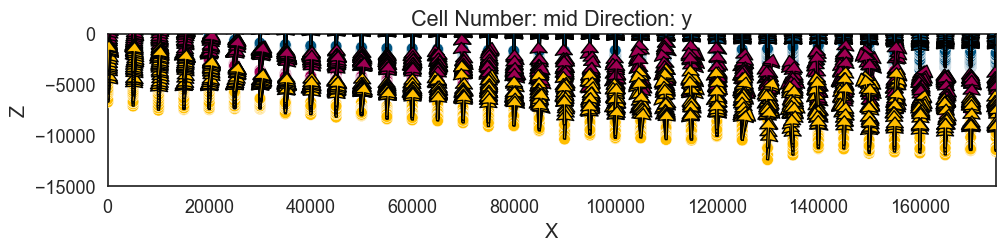

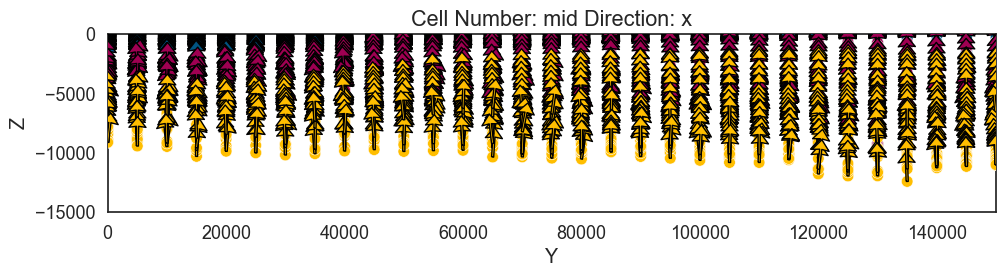

In [8]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [9]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [10]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range                230976.19
$C_o$            1270238095.24
drift equations   [3, 3, 3, 3]
CPU times: total: 19.2 s
Wall time: 20.7 s


In [11]:
geo_model.update_to_interpolator()

True

In [12]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 18min 21s
Wall time: 3min 29s



Lithology ids 
  [4. 4. 4. ... 2. 2. 2.] 

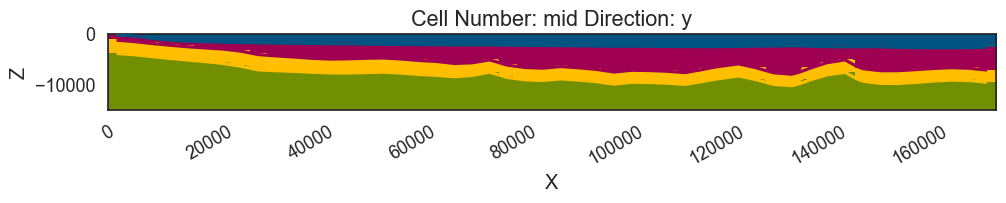

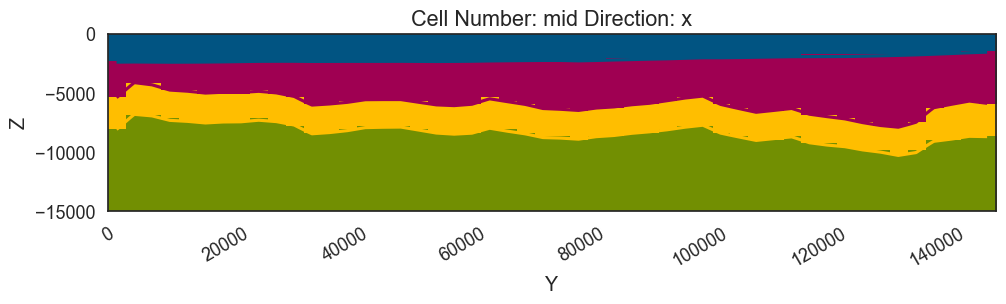

In [13]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [14]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [15]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

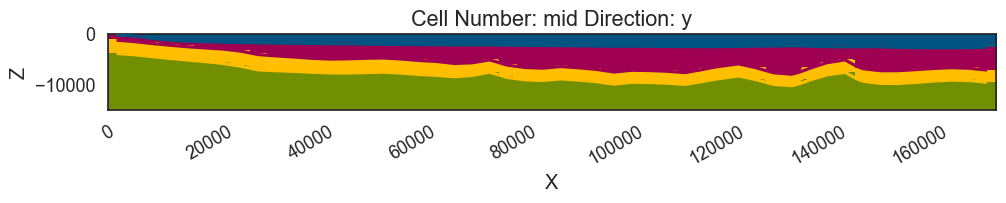

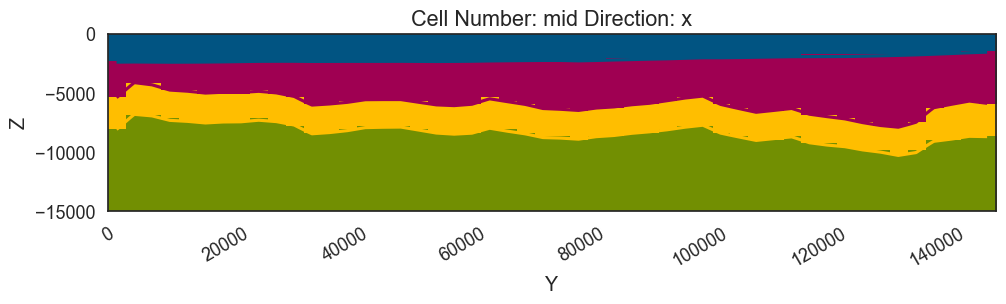

In [16]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

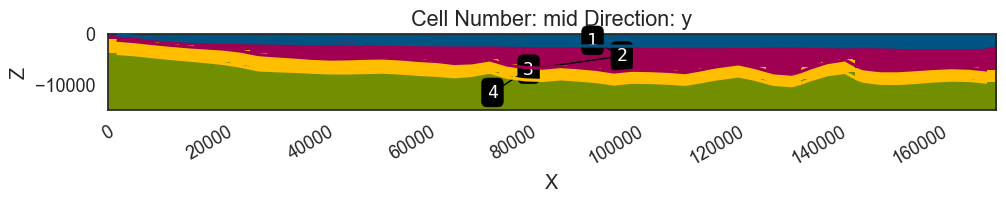

In [17]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [19]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [20]:
import pickle
save_path = "../../../../../output/BES/Dionisos/dionisos_horizons/teste_1/"
with open(save_path + "Dionisos_BES_Grid_v1.0.0", "wb") as f:
    pickle.dump(geo_model, f)